In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import random
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from livelossplot.tf_keras import PlotLossesCallback

/Users/misssavannahsky/anaconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2024-01-18 15:47:04.759785: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Load and preprocess the data

In [3]:
BATCH_SIZE = 100
IMG_SHAPE  = 150
train_image_generator = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode="nearest") 
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)
train_path = '/Users/misssavannahsky/Desktop/DataScienceCapstones/Capstone Three/training_set'
train_set = train_datagen.flow_from_directory(directory=train_path,target_size=(128,128),batch_size=32,color_mode="rgb",class_mode = 'binary')
test_path = '/Users/misssavannahsky/Desktop/DataScienceCapstones/Capstone Three/test_set'
test_set = train_datagen.flow_from_directory(directory=train_path,target_size=(128,128),batch_size=30,color_mode="rgb",class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


In [4]:
train_cats = '/Users/misssavannahsky/Desktop/DataScienceCapstones/Capstone Three/training_set/cats'
train_dogs = '/Users/misssavannahsky/Desktop/DataScienceCapstones/Capstone Three/training_set/dogs'
validation_cats = '/Users/misssavannahsky/Desktop/DataScienceCapstones/Capstone Three/test_set/cats'
validation_dogs = '/Users/misssavannahsky/Desktop/DataScienceCapstones/Capstone Three/test_set/dogs'

In [5]:
num_cats_tr = len(os.listdir(train_cats))
num_dogs_tr = len(os.listdir(train_dogs))

num_cats_val = len(os.listdir(validation_cats))
num_dogs_val = len(os.listdir(validation_dogs))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

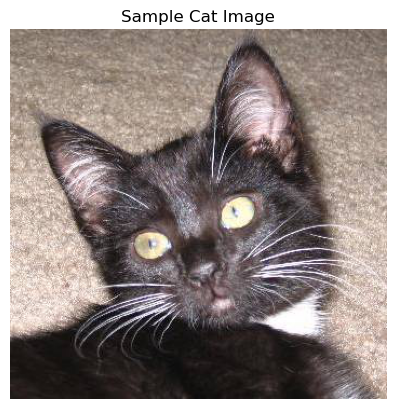

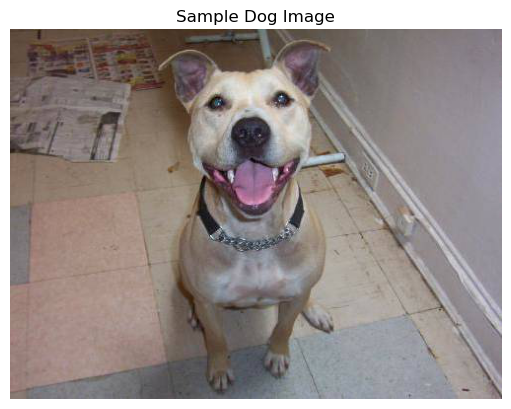

In [7]:
img_sample_cat=load_img(train_path + "/cats/cat.102.jpg")
plt.imshow(img_sample_cat)
plt.axis("off")
plt.title("Sample Cat Image")
plt.show()

plt.figure()

img_sample_dog=load_img(train_path + "/dogs/dog.83.jpg")
plt.imshow(img_sample_dog)
plt.axis("off")
plt.title("Sample Dog Image")
plt.show()

In [8]:
#Create and train the model

In [9]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (5,5), activation = "relu", input_shape = (128,128,3)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units = 256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = "sigmoid", name="output"))

In [10]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 32)        51232     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 29, 29, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 29, 29, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 16)        1

In [12]:
#Get accuracy 

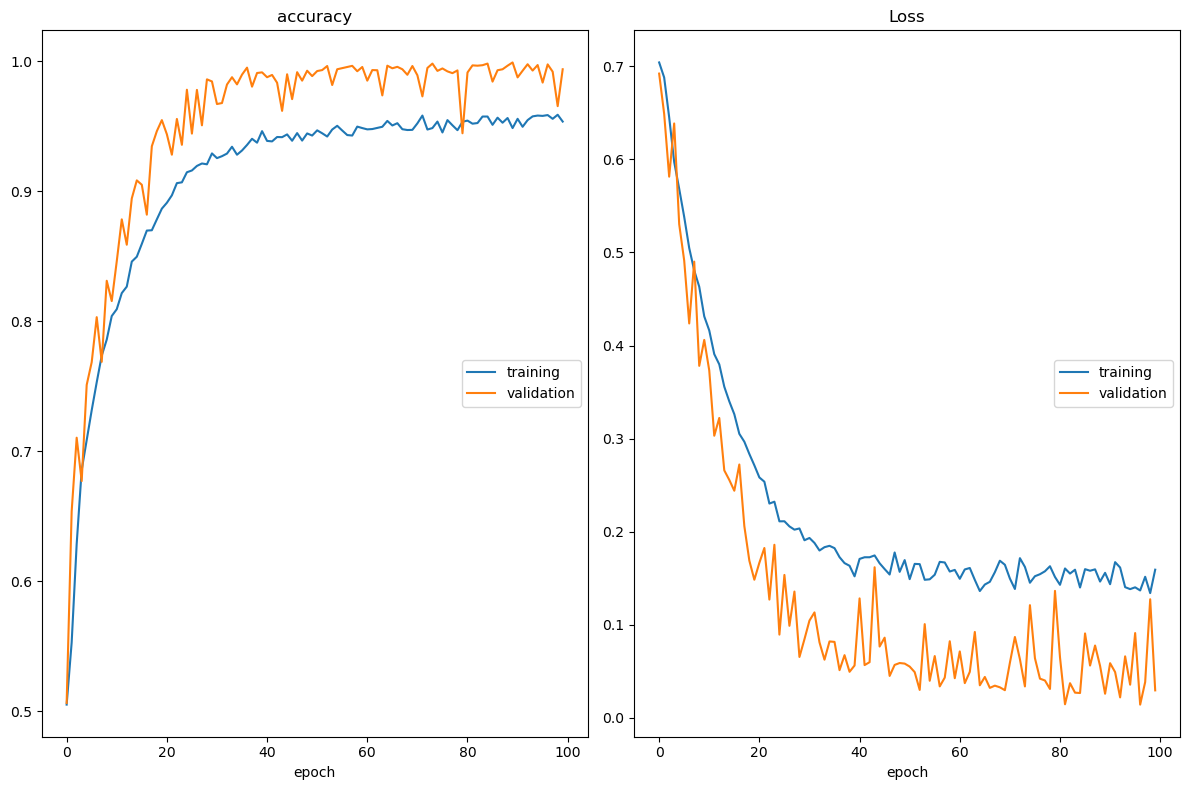

accuracy
	training         	 (min:    0.505, max:    0.959, cur:    0.954)
	validation       	 (min:    0.506, max:    0.999, cur:    0.994)
Loss
	training         	 (min:    0.134, max:    0.704, cur:    0.159)
	validation       	 (min:    0.014, max:    0.692, cur:    0.029)
250/250 [==============================] - 171s 683ms/step - loss: 0.1590 - accuracy: 0.9538 - val_loss: 0.0292 - val_accuracy: 0.9940


In [13]:
EPOCHS = 100

history = model.fit_generator(
    train_set,
    epochs=EPOCHS,
    validation_data=test_set,
    callbacks=[PlotLossesCallback()])